In [1]:
import pandas as pd

# Specify the path where you want to save the CSV file
file_path = 'data/word_attributions_rb.csv'

# Save the DataFrame to CSV
word_attributions_df = pd.read_csv(file_path)


In [2]:
word_attributions_df

,word,admiration_score,admiration_count,amusement_score,amusement_count,anger_score,anger_count,annoyance_score,annoyance_count,approval_score,...,relief_score,relief_count,remorse_score,remorse_count,sadness_score,sadness_count,surprise_score,surprise_count,neutral_score,neutral_count
0,<s>,0.000000,281,0.000000,113,0.000000,55,0.000000,83,0.000000,...,0.0,0,0.000000,45,0.000000,155,0.000000,37,0.000000,3405
1,hi,0.002015,2,0.035689,2,0.000000,0,0.000000,0,0.000000,...,0.0,0,0.471796,4,-0.019609,6,0.000000,0,1.322971,46
2,im,3.178083,51,1.657004,97,-0.002995,11,4.864147,69,0.624838,...,0.0,0,0.775257,33,5.088185,231,0.931619,18,-28.446197,439
3,r,-0.347111,21,0.080260,11,0.008351,1,0.266318,10,0.000000,...,0.0,0,0.177270,4,0.081016,8,0.090215,2,-1.290583,317
4,ick,-0.104215,4,0.000000,0,0.000000,0,0.000000,0,0.000000,...,0.0,0,0.000000,0,0.005500,1,0.000000,0,-0.787130,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13968,¿,0.000000,0,0.000000,0,0.000000,0,0.000000,0,0.000000,...,0.0,0,0.000000,0,0.000000,0,0.000000,0,0.000000,0
13969,ı,0.000000,0,0.000000,0,0.000000,0,0.000000,0,0.000000,...,0.0,0,0.000000,0,0.000000,0,0.000000,0,0.000000,0
13970,Ë,0.000000,0,0.000000,0,0.000000,0,0.000000,0,0.000000,...,0.0,0,0.000000,0,0.000000,0,0.000000,0,0.000000,0
13971,¢,0.000000,0,0.000000,0,0.000000,0,0.000000,0,0.000000,...,0.0,0,0.000000,0,0.000000,0,0.000000,0,0.000000,0


In [3]:
emotions = ['admiration',
       'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion',
       'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust',
       'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy',
       'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief',
       'remorse', 'sadness', 'surprise', 'neutral']
len(emotions)

28

## Venn Diagram

In [4]:
for emotion in emotions:
    score_col = emotion + "_score"
    count_col = emotion + "_count"
    avg_col = emotion + "_avg"
    word_attributions_df[avg_col] = word_attributions_df[score_col]/word_attributions_df[count_col]


In [5]:
top_10_words_score = {}
top_10_words_avg = {}

In [6]:
for emotion in emotions:
    col_name1 = emotion + "_score"
    series1 = word_attributions_df.sort_values(by=col_name1, ascending=False, inplace=False)['word'][:10]
    top_10_words_score[emotion] = series1.tolist()
    col_name2 = emotion + "_avg"
    series2 = word_attributions_df.sort_values(by=col_name2, ascending=False, inplace=False)['word'][:10]
    top_10_words_avg[emotion] = series2.tolist()

In [7]:
! pip install matplotlib_venn

Defaulting to user installation because normal site-packages is not writeable


In [8]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn2_circles

# Create Venn diagrams for all pairs of emotions
num_emotions = len(emotions)

overlapping_words_list = []

for i in range(num_emotions - 1):
    for j in range(i + 1, num_emotions):
        emotion1 = emotions[i]
        emotion2 = emotions[j]

        # Extract words for the current pair of emotions
        words1 = set(top_10_words_score[emotion1])
        words2 = set(top_10_words_score[emotion2])

        # Calculate the intersection for the subsets
        common_words = words1.intersection(words2)

        if len(common_words) == 0:
            continue
            
        else:

            overlapping_words_list.append((emotion1, emotion2, list(common_words)))


In [69]:
# remove pronouns

filtered_list = []

for tup in overlapping_words_list:
    (e1, e2, common_words_list) = tup
    if "i" not in common_words_list:
        if "im" not in common_words_list:
            if "ive" not in common_words_list:
                if "its" not in common_words_list:
                    if "you" not in common_words_list:
                        if e1 != "grief" and e2 != "relief":
                            filtered_list.append(tup)

In [70]:
filtered_list

[('admiration', 'approval', ['good', 'best']),
 ('admiration', 'desire', ['good']),
 ('admiration', 'gratitude', ['appreciated']),
 ('admiration', 'love', ['best']),
 ('admiration', 'optimism', ['best']),
 ('admiration', 'surprise', ['appreciated']),
 ('anger', 'annoyance', ['stupid', 'fucking', 'shit', 'hate']),
 ('annoyance', 'disapproval', ['hate', 'cant']),
 ('approval', 'gratitude', ['welcome']),
 ('caring', 'desire', ['please', 'help']),
 ('caring', 'gratitude', ['help']),
 ('caring', 'nervousness', ['help']),
 ('caring', 'optimism', ['help']),
 ('curiosity', 'surprise', ['wondering']),
 ('desire', 'gratitude', ['help', 'would']),
 ('desire', 'nervousness', ['really', 'help']),
 ('disappointment', 'disapproval', ['dont', 'like', 'nt', 'cant']),
 ('disappointment', 'love', ['like']),
 ('embarrassment', 'nervousness', ['really']),
 ('gratitude', 'nervousness', ['thanks', 'help']),
 ('gratitude', 'optimism', ['help']),
 ('gratitude', 'remorse', ['would']),
 ('gratitude', 'surprise',

# User Analysis

1. Emotion lifecycle
2. Sentiment lifecycle
3. Topic modelling lifecycle

In [11]:
# compile all reddit posts together

import pandas as pd
import json
import tqdm

datapath = "data/userReddit.csv"
reddit_data = pd.read_csv(datapath)

In [12]:
reddit_data['userId'].value_counts()

userId
CesaroSalad             791
serventofgaben          707
thecrazydeviant         445
schweenieboy            335
angelicdemon13          244
                       ... 
rinsllw                   1
Cutiepattotie5            1
WriotheslyEnthusiast      1
AirlineOwn3199            1
Awkward-Rub3379           1
Name: count, Length: 97, dtype: int64

In [13]:
reddit_data.columns

Index(['content', 'userId', 'createdTime', 'sentiment',
       'preprocessed_content'],
      dtype='object')

In [14]:
import matplotlib.pyplot as plt

# Assuming 'userId' is the column containing user IDs in the reddit_data DataFrame
user_post_counts = reddit_data['userId'].value_counts()

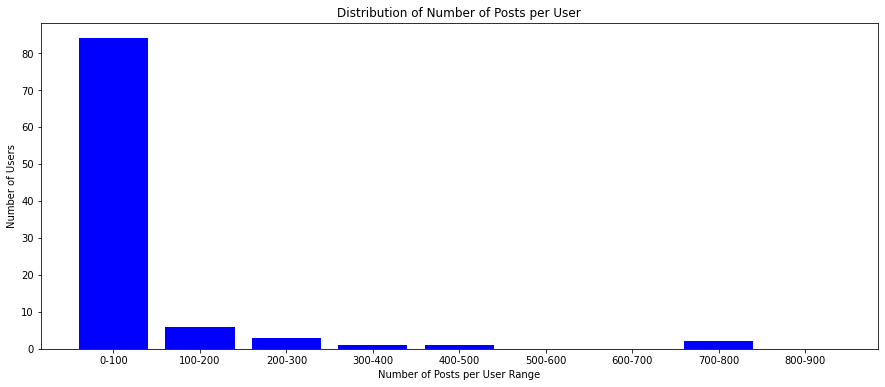

In [15]:
# Define the post count ranges
post_ranges = [(0, 100), (100, 200), (200, 300), (300, 400), (400, 500), (500, 600), (600, 700), (700, 800), (800, 900)]  # Add more ranges as needed

# Count the number of users falling into each range
counts_per_range = [(lower, upper, ((user_post_counts >= lower) & (user_post_counts < upper)).sum()) for lower, upper in post_ranges]

# Create a bar plot
fig, ax = plt.subplots(figsize=(15, 6))
ranges_labels = [f'{lower}-{upper}' for lower, upper in post_ranges]
ax.bar(ranges_labels, [count for _, _, count in counts_per_range], color='blue')

# Add labels and title
ax.set_xlabel('Number of Posts per User Range')
ax.set_ylabel('Number of Users')
ax.set_title('Distribution of Number of Posts per User')

# Display the plot
plt.show()

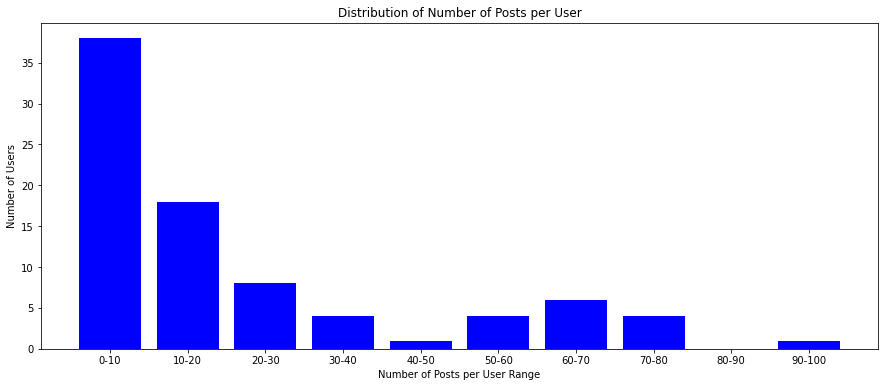

In [16]:
post_ranges = [(0, 10), (10, 20), (20, 30), (30, 40), (40, 50), (50, 60), (60, 70), (70, 80), (80, 90), (90, 100)]  # Add more ranges as needed

# Count the number of users falling into each range
counts_per_range = [(lower, upper, ((user_post_counts >= lower) & (user_post_counts < upper)).sum()) for lower, upper in post_ranges]

# Create a bar plot
fig, ax = plt.subplots(figsize=(15, 6))
ranges_labels = [f'{lower}-{upper}' for lower, upper in post_ranges]
ax.bar(ranges_labels, [count for _, _, count in counts_per_range], color='blue')

# Add labels and title
ax.set_xlabel('Number of Posts per User Range')
ax.set_ylabel('Number of Users')
ax.set_title('Distribution of Number of Posts per User')

# Display the plot
plt.show()

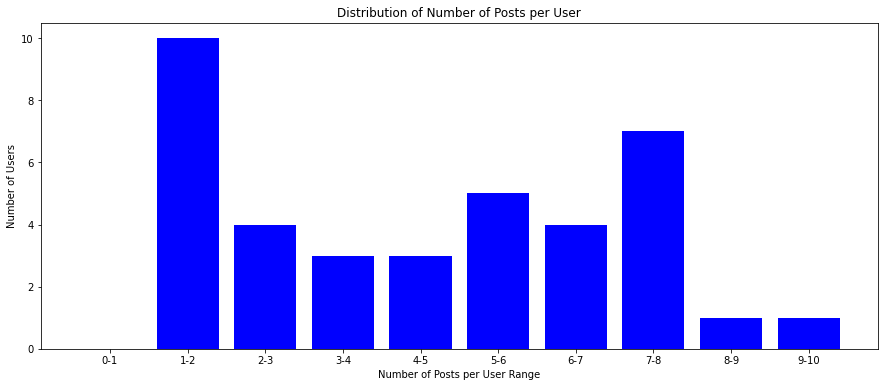

In [17]:
post_ranges = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10)]  # Add more ranges as needed

# Count the number of users falling into each range
counts_per_range = [(lower, upper, ((user_post_counts >= lower) & (user_post_counts < upper)).sum()) for lower, upper in post_ranges]

# Create a bar plot
fig, ax = plt.subplots(figsize=(15, 6))
ranges_labels = [f'{lower}-{upper}' for lower, upper in post_ranges]
ax.bar(ranges_labels, [count for _, _, count in counts_per_range], color='blue')

# Add labels and title
ax.set_xlabel('Number of Posts per User Range')
ax.set_ylabel('Number of Users')
ax.set_title('Distribution of Number of Posts per User')

# Display the plot
plt.show()

In [18]:
# get all posts from a user and find emotion of each post

reddit_data.head()

,content,userId,createdTime,sentiment,preprocessed_content
0,Hi I'm Rick Astley. Good to be back here again...,ReallyRickAstley,1.697728e+09,"{'neg': 0.0, 'neu': 0.806, 'pos': 0.194, 'comp...",hi im rick astley good back my new album are w...
1,Live stream chat with my new album and upcomin...,ReallyRickAstley,1.697647e+09,"{'neg': 0.06, 'neu': 0.713, 'pos': 0.227, 'com...",live stream chat new album upcoming ama hi im ...
2,Coming soon…\n,ReallyRickAstley,1.697149e+09,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",coming soon
3,Rick Astley (me) - Never Gonna Stop [Pop]\n,ReallyRickAstley,1.693502e+09,"{'neg': 0.0, 'neu': 0.726, 'pos': 0.274, 'comp...",rick astley never gonna stop pop
4,Rick Astley (me) - Dippin My Feet [Pop]\n,ReallyRickAstley,1.689269e+09,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",rick astley dippin my feet pop


In [19]:
import json

# Open and read the JSON file as a list of lists
with open("RedditUserResults/ClassificationResults/rb_outputs.json", 'r') as file:
    classifier_rb_ops = json.load(file)

# Open and read the JSON file as a list of lists
with open("RedditUserResults/ClassificationResults/rb_errors.json", 'r') as file:
    classifier_rb_errors = json.load(file)


In [20]:
reddit_data.drop(classifier_rb_errors, axis=0, inplace=True)
reddit_data.reset_index(drop=True, inplace=True)


In [79]:
users = list(set(reddit_data['userId']))

user_emotion_lifecycle = {}
user_sentiment_lifecycle = {}

In [80]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

#Define a function to perform sentiment analysis using VADER
def get_sentiment(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment

Lifecycle of emotion label and sentiment analysis (compound score from VADER)

In [81]:
# ! pip install tqdm
from tqdm import tqdm

In [82]:
reddit_data[reddit_data['userId'] == user].info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, 2068 to 2074
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   content               7 non-null      object 
 1   userId                7 non-null      object 
 2   createdTime           7 non-null      float64
 3   sentiment             7 non-null      object 
 4   preprocessed_content  7 non-null      object 
dtypes: float64(1), object(4)
memory usage: 336.0+ bytes


In [83]:
for user in tqdm(users, desc="Processing user posts", unit="user"):
    # getting lifecycle of emotions of a user
    emotions = []
    
    # getting lifecycle of sentiments of a user
    sentiments = []

    # getting history of a user, and sorting it based on time
    user_history = reddit_data[reddit_data['userId'] == user]
    sorted_history = user_history.sort_values(by='createdTime')

    # getting emotion for each post id (from saved results of the classification model)
    upost_ids = sorted_history.index.tolist()
    for post_id in upost_ids:
        try:
            emotion = classifier_rb_ops[post_id][0]['label']
            emotions.append(emotion)
        except:
            print(post_id)
    user_emotion_lifecycle[user] = emotions

    # getting sentiment values for each post
    uposts = reddit_data[reddit_data['userId'] == user]['preprocessed_content'].tolist()
    for upost in uposts:
        sentiment = get_sentiment(upost)['compound']
        sentiments.append(sentiment)
    user_sentiment_lifecycle[user] = sentiments

Processing user posts: 100%|██████████| 97/97 [00:01<00:00, 66.73user/s]


In [86]:
# user_sentiment_lifecycle
# user_emotion_lifecycle

In [33]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/msaxena4/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
# getting life cycle of topic modelling of a user

from gensim import corpora, models
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

user_topics_lifecycle = {}

for user in tqdm(users, desc="Processing user posts", unit="user"):
    topics = []
    uposts = reddit_data[reddit_data['userId'] == user]['preprocessed_content'].tolist()
    post_tokens = [word_tokenize(post) for post in uposts]

    # Create a dictionary representation of the posts
    dictionary = corpora.Dictionary(post_tokens)
    
    # Create a document-term matrix
    corpus = [dictionary.doc2bow(post) for post in post_tokens]
    
    # Build the LDA model
    lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)
    
    # Get the topics for each post
    post_topics = []
    for i, upost in enumerate(uposts):
        # Get the document-term matrix for the post
        post_bow = dictionary.doc2bow(post_tokens[i])
    
        # Get the topics for the post
        topics = lda_model.get_document_topics(post_bow)
        
        # Append the topics to the list
        post_topics.append(topics)
    
    user_topics_lifecycle[user] = post_topics

Processing user posts: 100%|██████████| 97/97 [00:27<00:00,  3.47user/s]


In [36]:
len(users)

97

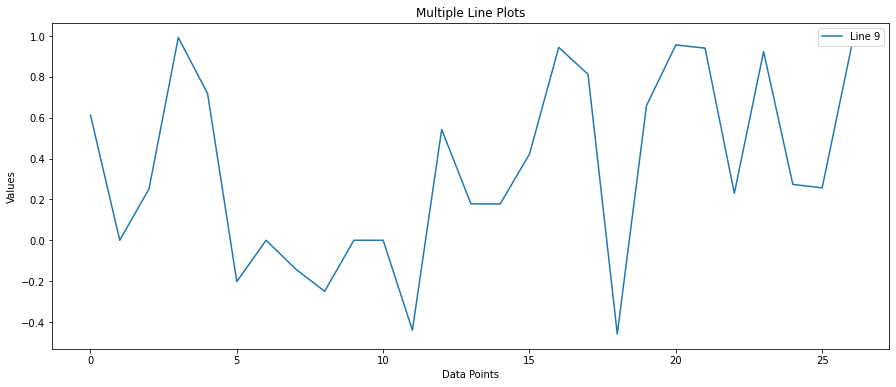

In [89]:
user = users[4]

# Set the figure size
plt.figure(figsize=(15, 6))

# Sample data
data = user_sentiment_lifecycle[user]
plt.plot(data, label=f'Line {idx}')

# Add labels and title
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Multiple Line Plots')

# Add a legend
plt.legend()

# Display the plot
plt.show()


In [71]:
user = users[2]

# Set the figure size
plt.figure(figsize=(15, 6))

# Sample data
data = user_topics_lifecycle[user]
print(data)

[[(2, 0.9763719)], [(0, 0.050042544), (1, 0.050426967), (2, 0.050125957), (3, 0.799362), (4, 0.050042484)], [(3, 0.9949528)], [(0, 0.100063175), (1, 0.5998237), (2, 0.10003821), (3, 0.10001157), (4, 0.10006334)], [(0, 0.10006319), (1, 0.5998238), (2, 0.1000382), (3, 0.10001157), (4, 0.100063264)], [(1, 0.9898483)], [(3, 0.9918936)]]


<Figure size 1080x432 with 0 Axes>

## analysing grief and relief

In [54]:
word_attributions_df[['grief_score', 'relief_score']].value_counts()

grief_score  relief_score
0.0          0.0             13973
Name: count, dtype: int64

In [60]:
labels = {}
labels["label_col"] = []
for output in classifier_rb_ops:
    labels['label_col'].append(output[0]['label'])

In [62]:
df = pd.DataFrame(labels)

In [64]:
df.value_counts(dropna=False)

label_col     
neutral           3405
admiration         281
love               260
curiosity          168
gratitude          158
sadness            155
joy                127
amusement          113
annoyance           83
disappointment      81
fear                78
excitement          74
desire              64
confusion           55
anger               55
disapproval         47
remorse             45
optimism            44
approval            37
surprise            37
nervousness         34
caring              33
realization         32
disgust             18
embarrassment        8
pride                3
Name: count, dtype: int64

In [66]:
len(set(df['label_col']))

26

In [93]:
state_transitions = [value for value in user_emotion_lifecycle.values()]

In [97]:
with open('emotion_transitions.json', 'w') as jsonfile:
    json.dump(state_transitions, jsonfile)

In [98]:
with open('user_emotion_lifecycle.json', 'w') as jsonfile:
    json.dump(user_emotion_lifecycle, jsonfile)